In [41]:
import pandas as pd
train=pd.read_csv('train_users_2.csv')
test=pd.read_csv('test_users.csv')
session=pd.read_csv('sessions.csv')
country=pd.read_csv('countries.csv')

In [42]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [43]:
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


Test is one column short of train i.e., target variable = country_destination

In [44]:
test.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

1. As every data of feature date_first_booking is zero, will drop it.
2. 46.5% of test data has age as Nan

In [45]:
train.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

1. 41% of train data has age as Nan
2. 3% of train data has first_affiliate_tracked as Nan
3. date_first_booking should also be dropped 
4. Many entries of gender are -unknown- 

In [46]:
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [47]:
session.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

1. secs_elapsed will be a very good feature. 1% of data Nan. Should replace them with 0.
2. user_id has .3% data  as Nan. Think no problem will arise if these rows are dropped.

In [48]:
session=session[session.user_id.notna()]
session.secs_elapsed=session.secs_elapsed.fillna(0)

In [49]:
session=session.groupby('user_id').sum()

In [50]:
session['id']=session.index
session.index=range(0,len(session),1)

In [51]:
total=pd.concat([train,test])
total=pd.merge(total,session,on='id',how='left')

In [52]:
total.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
country_destination         62096
secs_elapsed               140064
dtype: int64

1. Almost 50% of secs_elapsed is Nan (doesn't match with id). Will be dropping that down.
2. 42% of age is Nan. Replacing it with mean won't make any sense, best thing is dropping it down. But it looks like the only promising feature....

In [53]:
total=pd.concat([train,test])

In [54]:
country.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


Won't be able to use this dataframe for training our model as all the data here are derived from our target variable. We cannot use something derived from target to predict target itself.

In [18]:
total.drop(['date_first_booking','id'],axis=1,inplace=True)
total.age=total.age.fillna(total.age.mean())
total.first_affiliate_tracked=total.first_affiliate_tracked.fillna(total.first_affiliate_tracked.mode()[0])

In [19]:
total.loc[total.gender=='-unknown-']

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,-unknown-,47.14531,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
4,2010-09-14,20091208061105,-unknown-,41.00000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,2010-01-01,20100101215619,-unknown-,47.14531,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
9,2010-01-04,20100104023758,-unknown-,46.00000,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US
12,2010-01-05,20100105060859,-unknown-,47.14531,basic,0,en,direct,direct,untracked,Web,Other/Unknown,-unknown-,FR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62090,2014-09-30,20140930235019,-unknown-,47.14531,basic,0,en,seo,yahoo,linked,Web,Windows Desktop,Chrome,NaN
62091,2014-09-30,20140930235232,-unknown-,31.00000,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN
62092,2014-09-30,20140930235306,-unknown-,47.14531,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,NaN
62093,2014-09-30,20140930235408,-unknown-,47.14531,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,NaN


1. 46% of people gender is unknown, which is nothing but Nan.
2. 16% of first_browser is unknown, will later decide whether useful or not.

In [20]:
obj_col=total.select_dtypes(include='object')
obj_col=obj_col.columns
obj_col=obj_col.drop(['date_account_created','country_destination'])

In [21]:
from sklearn.preprocessing import LabelEncoder
for col in obj_col:
    total[col]=LabelEncoder().fit_transform(total[col])

In [22]:
total.country_destination.unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU', nan], dtype=object)

In [23]:
countries={'NDF':1, 'US':2, 'other':3, 'FR':4, 'CA':5, 'GB':6, 'ES':7, 'IT':8, 'PT':9, 'NL':10,
       'DE':11, 'AU':12}
total.country_destination=total.country_destination.map(countries)

In [24]:
total

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,0,47.14531,1,0,6,2,4,6,2,3,8,1.0
1,2011-05-25,20090523174809,2,38.00000,1,0,6,7,8,6,2,3,8,1.0
2,2010-09-28,20090609231247,1,56.00000,0,3,6,2,4,6,2,6,22,2.0
3,2011-12-05,20091031060129,1,42.00000,1,0,6,2,4,6,2,3,17,3.0
4,2010-09-14,20091208061105,0,41.00000,0,0,6,2,4,6,2,3,8,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,2014-09-30,20140930235232,0,31.00000,0,0,6,2,4,6,2,6,22,NaN
62092,2014-09-30,20140930235306,0,47.14531,0,23,16,2,4,6,0,0,0,NaN
62093,2014-09-30,20140930235408,0,47.14531,0,0,4,2,4,0,2,6,17,NaN
62094,2014-09-30,20140930235430,0,47.14531,0,0,6,5,8,3,2,3,43,NaN


In [25]:
from datetime import datetime
total['Year'] = total.date_account_created.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").year)
total['Month'] = total.date_account_created.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").month)

In [26]:
total.drop(['date_account_created','timestamp_first_active'],axis=1,inplace=True)

In [27]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
total.columns

Index(['gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'Year', 'Month'],
      dtype='object')

## Countplot

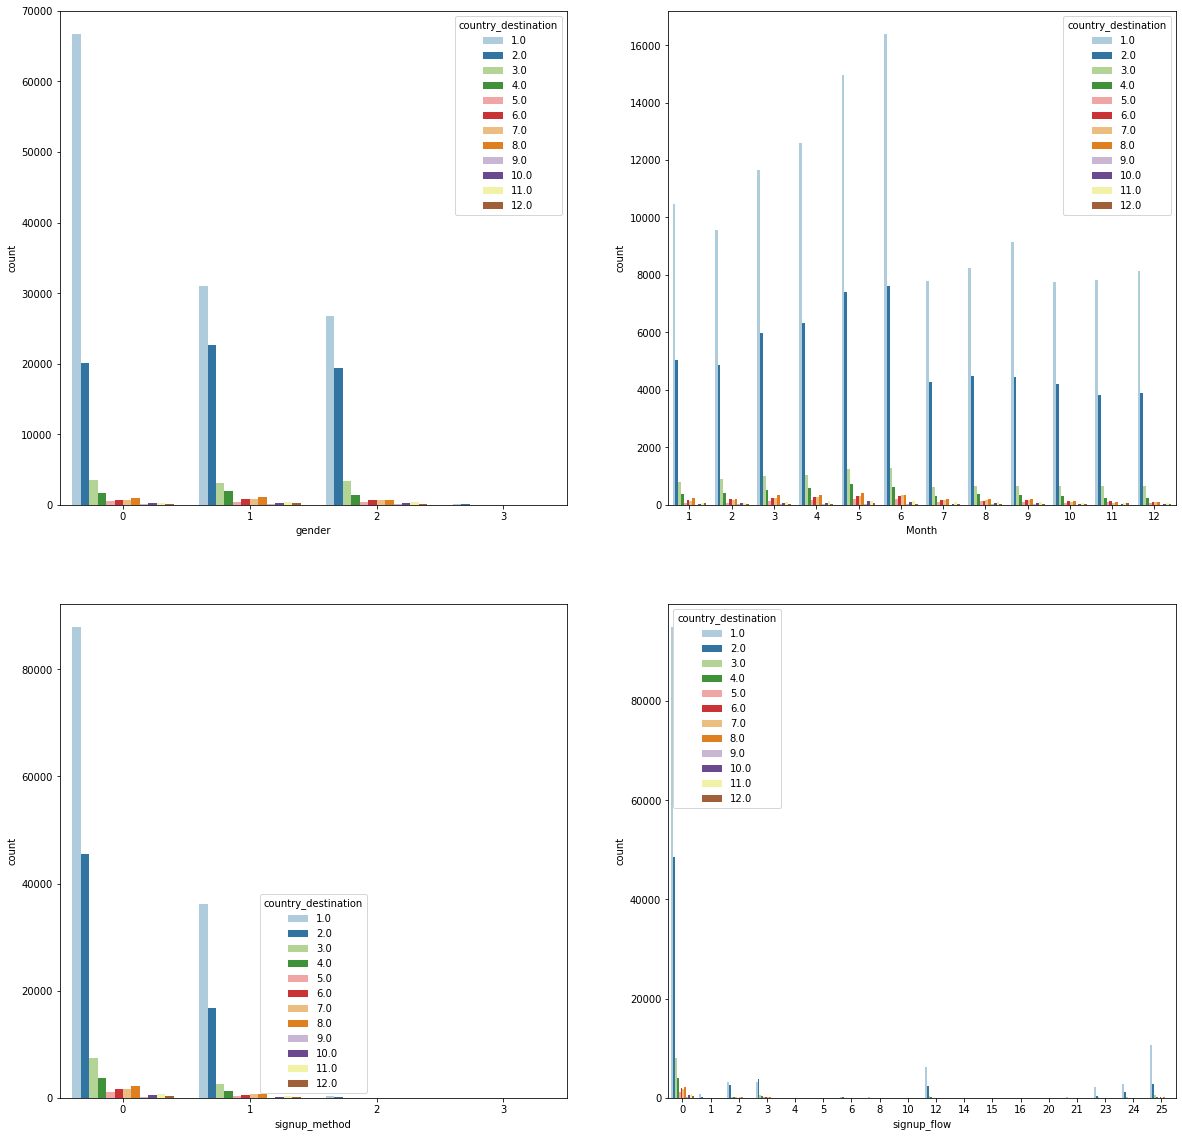

In [39]:
sns.set_palette(sns.color_palette("Paired"))
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
sns.countplot(total.gender,hue=total.country_destination,ax=ax[0][0])
sns.countplot(total.Month,hue=total.country_destination,ax=ax[0][1])
sns.countplot(total.signup_method,hue=total.country_destination,ax=ax[1][0])
sns.countplot(total.signup_flow,hue=total.country_destination,ax=ax[1][1])

1. Most users who give their gender as 0 never book a room
2. Booking drops after the month of June.
3. signup_flow = 0 if consists of most booking of country 2.

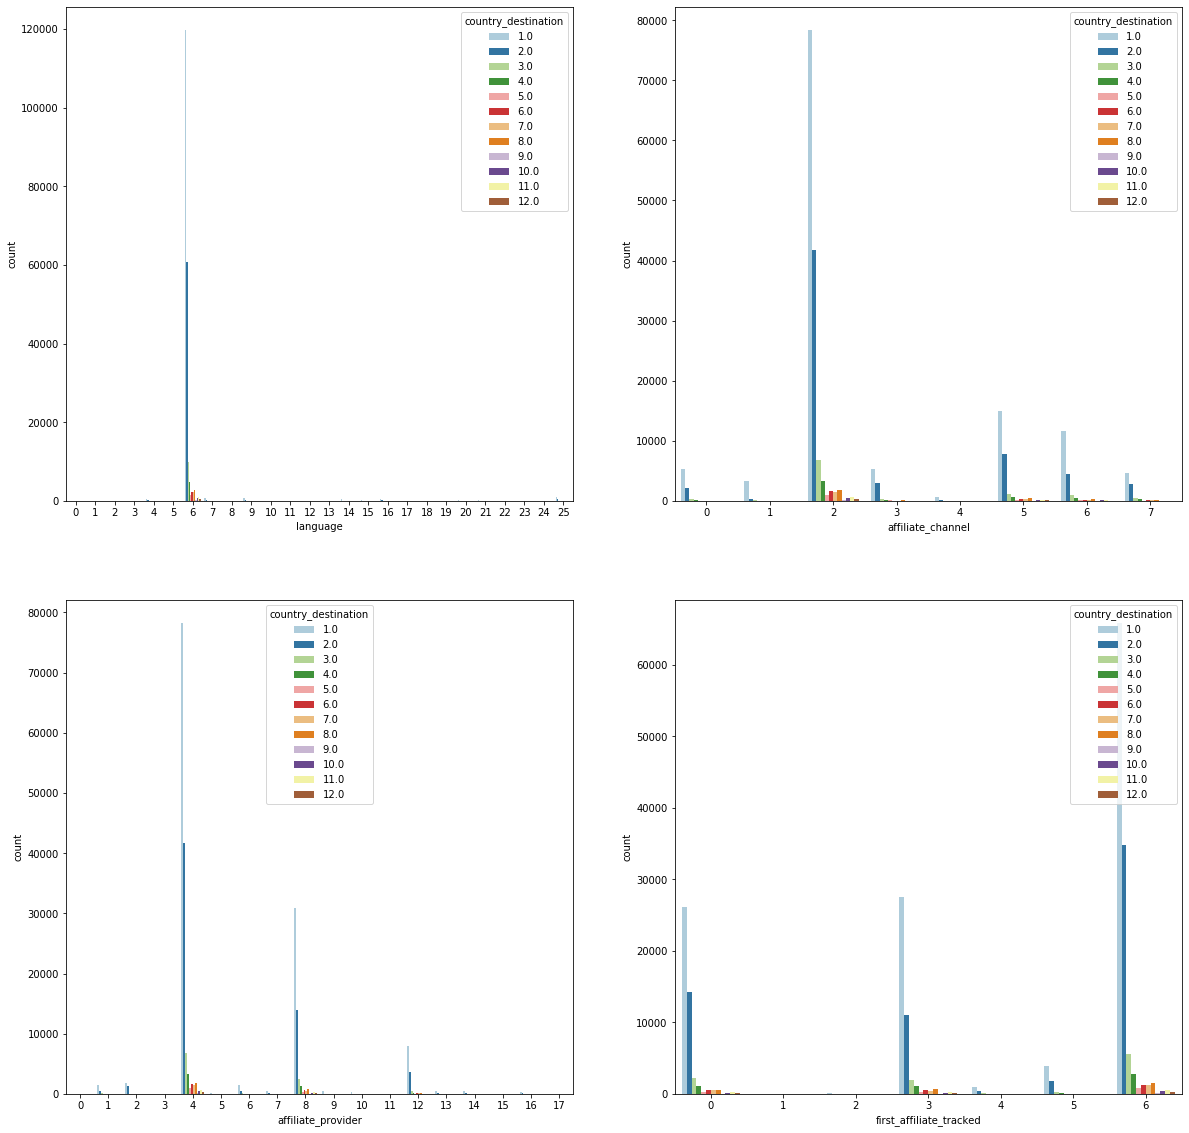

In [40]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
sns.countplot(total.language,hue=total.country_destination,ax=ax[0][0])
sns.countplot(total.affiliate_channel,hue=total.country_destination,ax=ax[0][1])
sns.countplot(total.affiliate_provider,hue=total.country_destination,ax=ax[1][0])
sns.countplot(total.first_affiliate_tracked,hue=total.country_destination,ax=ax[1][1])

1. Most people choose country 2 as their destination ( excluding 1 )
2. The categorical variables does not affect the country_destination much.

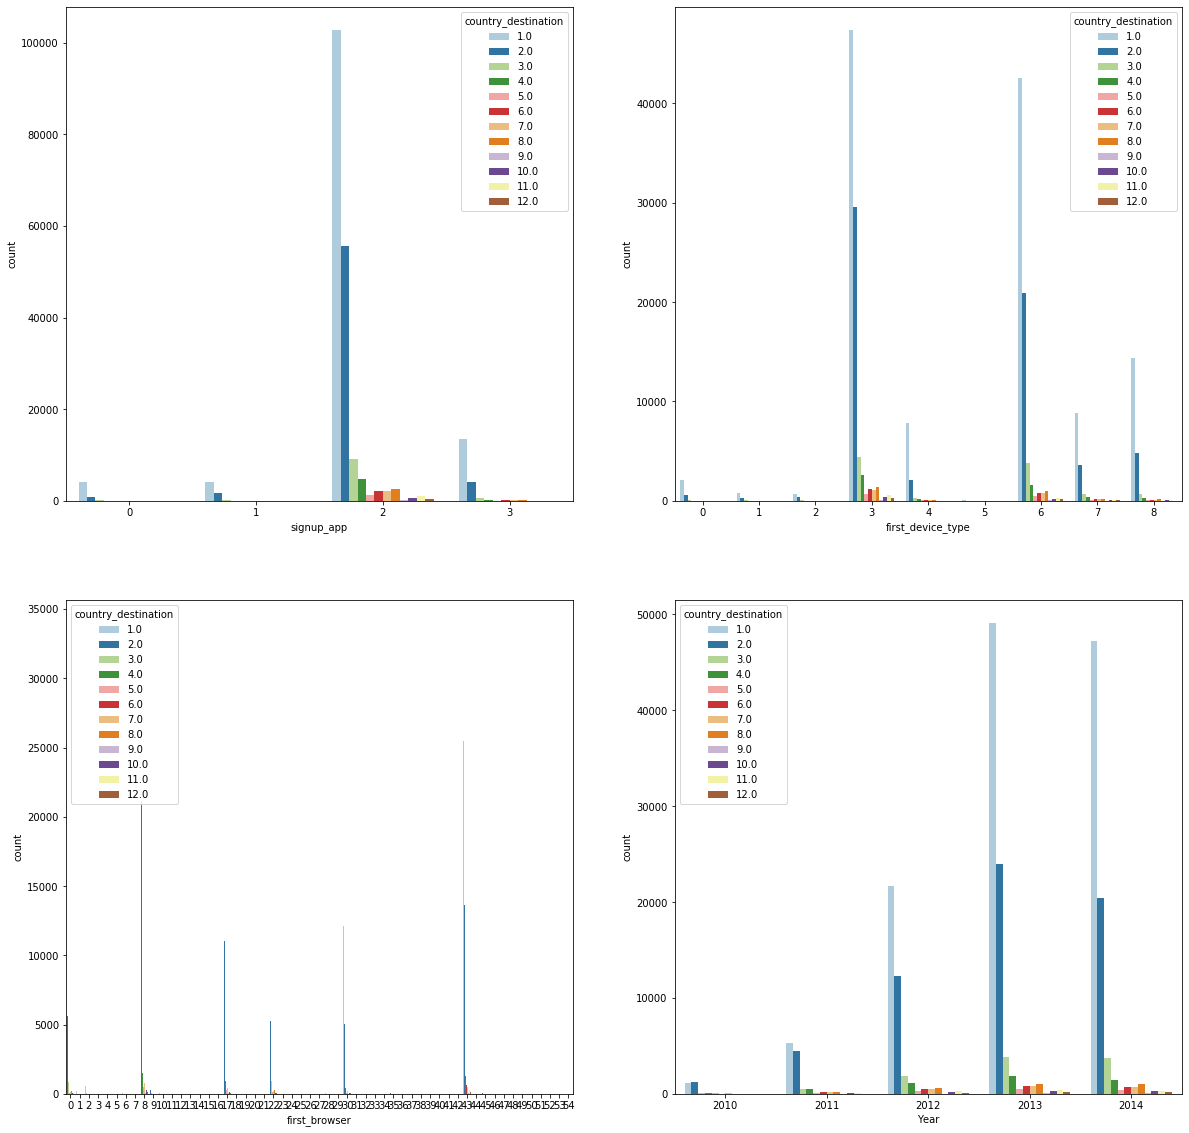

In [31]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
sns.countplot(total.signup_app,hue=total.country_destination,ax=ax[0][0])
sns.countplot(total.first_device_type,hue=total.country_destination,ax=ax[0][1])
sns.countplot(total.first_browser,hue=total.country_destination,ax=ax[1][0])
sns.countplot(total.Year,hue=total.country_destination,ax=ax[1][1])

1. The categorical variables does not affect the country_destination significantly.
2. The company's buisiness gradually picked up.

## Boxplot

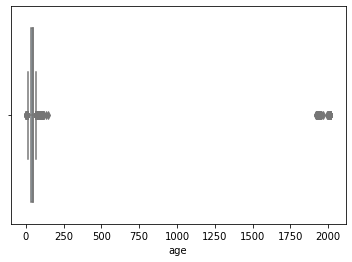

In [32]:
sns.boxplot(total.age)

So many easily visible outliers of age. Will cap them at 100.

In [33]:
age_outliers=total.loc[total.age>120].index
for i in age_outliers:
    total.age[i]=100

<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.age[i]=100
<ipython-input-33-f5f7d77e0d6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

## Scatterplot

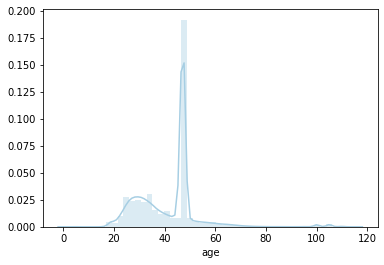

In [34]:
sns.distplot(total.age)

Lets find out what is that overshoot?

In [35]:
import statistics
statistics.mode(total.age)

47.145310402631694

It looks like the mean value of age which we used for replacing mean

## New features

In [36]:
total

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,Year,Month
0,0,47.14531,1,0,6,2,4,6,2,3,8,1.0,2010,6
1,2,38.00000,1,0,6,7,8,6,2,3,8,1.0,2011,5
2,1,56.00000,0,3,6,2,4,6,2,6,22,2.0,2010,9
3,1,42.00000,1,0,6,2,4,6,2,3,17,3.0,2011,12
4,0,41.00000,0,0,6,2,4,6,2,3,8,2.0,2010,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,0,31.00000,0,0,6,2,4,6,2,6,22,NaN,2014,9
62092,0,47.14531,0,23,16,2,4,6,0,0,0,NaN,2014,9
62093,0,47.14531,0,0,4,2,4,0,2,6,17,NaN,2014,9
62094,0,47.14531,0,0,6,5,8,3,2,3,43,NaN,2014,9


In [37]:
#Create a new feature which is 1 if the Month is 1 to 6
total['Month1to6']=(total.Month<7) *1

## Heatmap

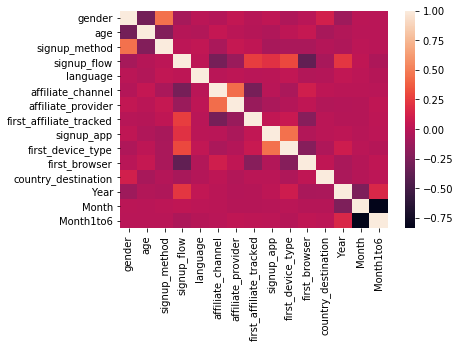

In [38]:
#Last step,remove highly correlated variables and them train
sns.heatmap(total.corr())

## Train Model

In [210]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
train=total[total.country_destination.notna()]
test=total[total.country_destination.isna()]
tx,vx,ty,vy=train_test_split(train.drop('country_destination',axis=1),train.country_destination)

### Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression(max_iter=100000)
LR.fit(tx,ty)
predict=LR.predict(vx)
print(accuracy_score(vy,predict))

0.5955812079530761


In [162]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(tx,ty)
predict=RFC.predict(vx)
print(accuracy_score(vy,predict))

0.5870547008226674


In [163]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(tx,ty)
predict=XGB.predict(vx)
print(accuracy_score(vy,predict))

0.6370893690384724


In [165]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,20,1):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(tx,ty)
    predict=KNN.predict(vx)
    print(i)
    print(accuracy_score(vy,predict))

KeyboardInterrupt: 

In [211]:
test.drop('country_destination',axis=1,inplace=True)
submit=XGB.predict(test)

C:\Users\GOWRI\anaconda3\envs\mltutorial\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [212]:
test1=pd.read_csv('test_users.csv')
sub_df=pd.DataFrame(test1.id)

In [213]:
sub_df.insert(1,'country',submit,True)

In [215]:
dict1={1:'NDF', 2: 'US', 3:'other', 4:'FR', 5:'CA', 6:'GB', 7:'ES', 8:'IT', 9:'PT', 10:'NL',
       11:'DE', 12:'AU'}
sub_df.country=sub_df.country.map(dict1)

In [217]:
sub_df.to_csv('Submit1.csv',index=False)